Student Performance Indicator

Life cycle of Machine learning Project

    Understanding the Problem Statement

    Data Collection

    Data Checks to perform

    Exploratory data analysis

    Data Pre-Processing

    Model Training
    
    Choose best model

1) Problem statement:-

    This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection:-

    Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

    The data consists of 8 column and 1000 rows.

    2.1 Import Data and Required Packages

        Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Import the csv data file as pandas Dataframe

In [2]:
df = pd.read_csv("data/study.csv")

Verify the sample of 5 data points

In [3]:
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
3,male,group A,associate's degree,free/reduced,none,47,57,44
998,female,group D,some college,standard,completed,68,78,77
652,female,group D,some college,standard,completed,85,86,98
127,male,group D,some college,standard,completed,65,77,74
14,female,group A,master's degree,standard,none,50,53,58


Shape of the dataframe

In [4]:
df.shape

(1000, 8)

    2.2 Information about the data

        o> gender : sex of students -> (Male/female)

        o> race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

        o> parental level of education : parents' final education
           (bachelor's degree,some college,master's degree,associate's degree,high school)

        o> lunch : having lunch before test (standard or free/reduced)

        o> test preparation course : complete or not complete before test

        o> math score

        o> reading score

        o> writing score

3. Data Checks to perform

    o> Check Missing values

    o> Check Duplicates

    o> Check data type

    o> Check the number of unique values of each column

    o> Check statistics of data set
    
    o> Check various categories present in the different categorical column

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

3.1 There is no missing value in the dataset

In [6]:
df.duplicated().sum()

0

3.2 There is no duplicate values in the dataset

3.3 Dtypes of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There is no NaN or null values and 3 numerical variables and 5 categorical variables are there.

3.4 Number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

3.5 Statistics of the data

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights:- 

    => From above description of numerical data, all means are very close to each other and which is in between 66 and 68.05

    => All standard deviations are also close and which is in between 14.6 and 15.19

    => While there is a minimum score 0 for math, for writing minimum is much higher and which is 10 and for reading much higher and which is 17

3.7 Analysing the Data

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [25]:
print("Categorical values in the 'Gender' Variable are ", end=" ")
print(df['gender'].unique())
#print("Categorical values in the 'Gender' Variable are ", df['gender'].unique()) we can use this statement also
print("Categorical values in the 'Race Ethnicity' Variable are ", end=" ")
print(df['race_ethnicity'].unique())
print("Categorical values in the 'Parental Level of Education' Variable are ", end=" ")
print(df['parental_level_of_education'].unique())
print("Categorical values in the 'Lunch' Variable are ", end=" ")
print(df['lunch'].unique())
print("Categorical values in the 'Test Preparation Course' Variable are ", end=" ")
print(df['test_preparation_course'].unique())

## Passing the whitespace to the end parameter (end=' ') indicates that the end character has to be identified by whitespace and not a newline.

Categorical values in the 'Gender' Variable are  ['female' 'male']
Categorical values in the 'Race Ethnicity' Variable are  ['group B' 'group C' 'group A' 'group D' 'group E']
Categorical values in the 'Parental Level of Education' Variable are  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categorical values in the 'Lunch' Variable are  ['standard' 'free/reduced']
Categorical values in the 'Test Preparation Course' Variable are  ['none' 'completed']


In [24]:
## Define the numerical features and categorical features

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} Numerical features : {}".format(len(numeric_features),numeric_features))
print("\nWe have {} Categorical features : {}".format(len(categorical_features), categorical_features)) 

# \n is new line character and which is used to create a new line.

We have 3 Numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 Categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [26]:
df.sample(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
307,male,group C,some high school,standard,none,51,52,44
237,female,group D,some high school,standard,completed,64,60,74
313,female,group C,associate's degree,free/reduced,completed,68,67,69


3.8 Adding columns for "Total Score" and "Average" variables

In [27]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3 

In [28]:
df.sample(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
551,male,group B,bachelor's degree,free/reduced,completed,87,90,88,265,88.333333
440,female,group C,some college,standard,completed,67,81,79,227,75.666667
849,male,group D,associate's degree,standard,none,80,75,69,224,74.666667


In [29]:
df.describe()

,math_score,reading_score,writing_score,total_score,average
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [33]:
math_full = df[df['math_score'] == 100]
writing_full = df[df['writing_score'] == 100]
reading_full = df[df['reading_score'] == 100]

print("No of students who get 100% marks in maths are : ", len(math_full))
print("\nNo of students who get 100% marks in writing are : ", len(writing_full))
print("\nNo of students who get 100% marks in reading are : ", len(reading_full))

No of students who get 100% marks in maths are :  7

No of students who get 100% marks in writing are :  14

No of students who get 100% marks in reading are :  17


In [41]:
## As per the domain expert's advise : if the stident scores more than or equal to 35 marks then he got passed in that test

failed_in_maths = df[df['math_score'] < 35 ]['math_score'].count()
failed_in_writing = df[df['writing_score'] < 35]['math_score'].count()
failed_in_reading = df[df['reading_score'] < 35]['math_score'].count()

print("No of students failed in maths : ", failed_in_maths)
print("\nNo of students failed in writing are : ", failed_in_writing)
print("\nNo of students failed in reading are : ", failed_in_reading)

No of students failed in maths :  22

No of students failed in writing are :  17

No of students failed in reading are :  15


Insights:-

    => More number of students failed in maths

    => Students are good at reading 

4. Visualization of Data

Histogram 
    - Traditional visualization tool that counts the number of data that fall into discrete bins to illustrate the distribution of one or more variables. 
    This function can add a smooth curve derived using a kernel density estimate to the statistic computed within each bin to estimate frequency, density, or probability mass.
    
Kernel Distribution Function (KDE)
    - a way to estimate the probability density function of a continuous random variable.

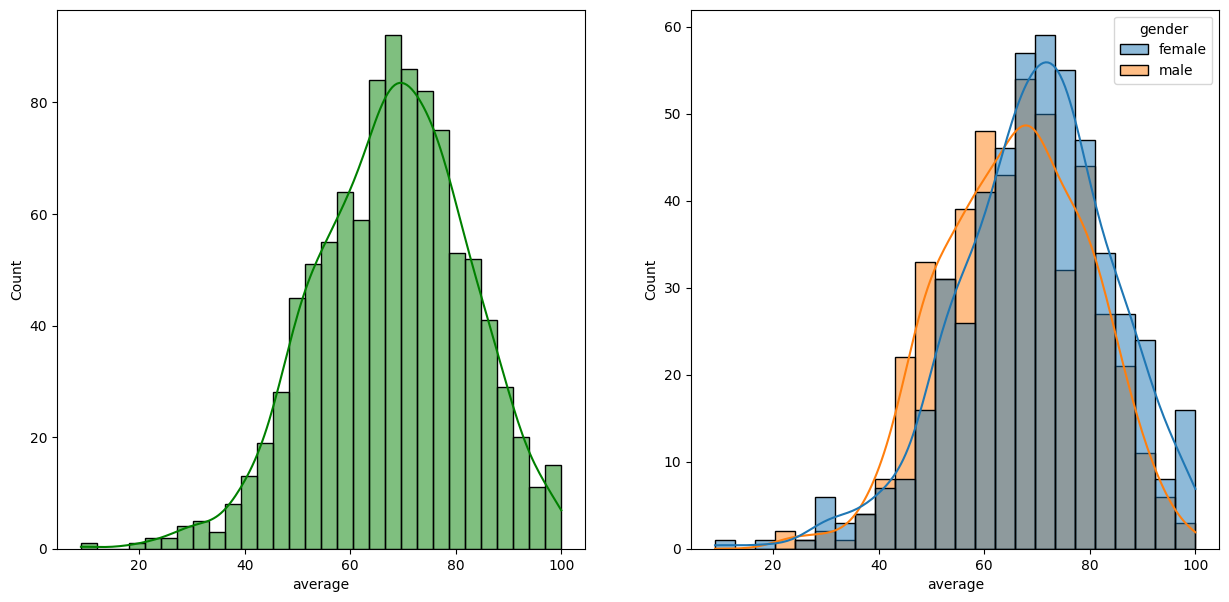

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121) #The matplotlib. pyplot. subplots method provides a way to plot multiple plots on a single figure. 
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

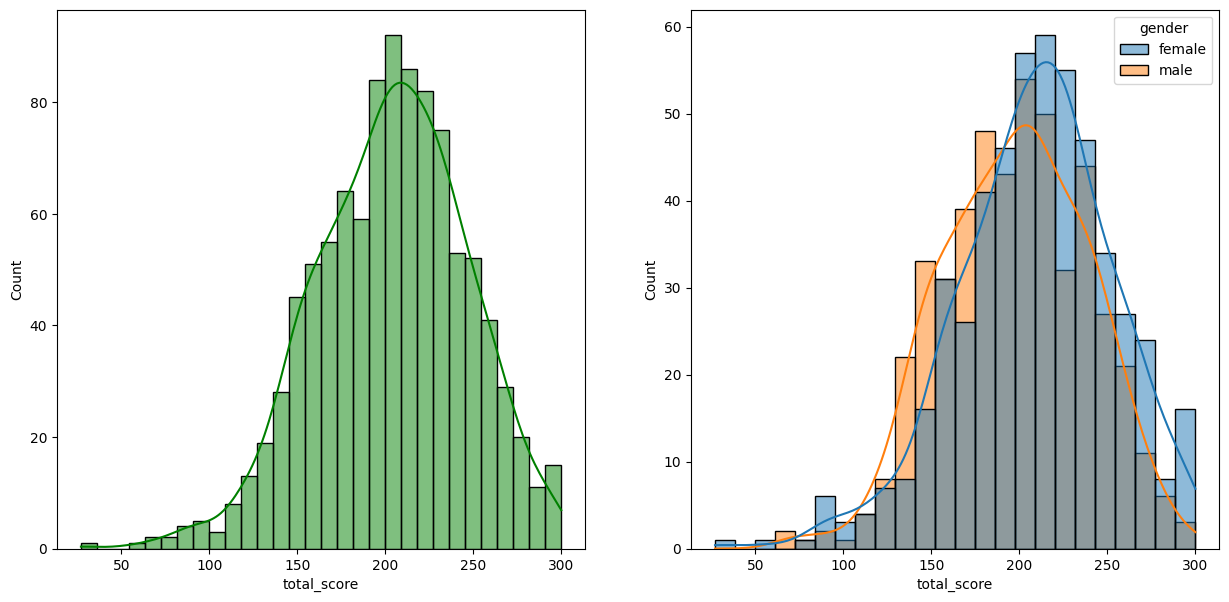

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121) #The matplotlib. pyplot. subplots method provides a way to plot multiple plots on a single figure. 
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

Insights:-

    => Female students are performing well in the exams

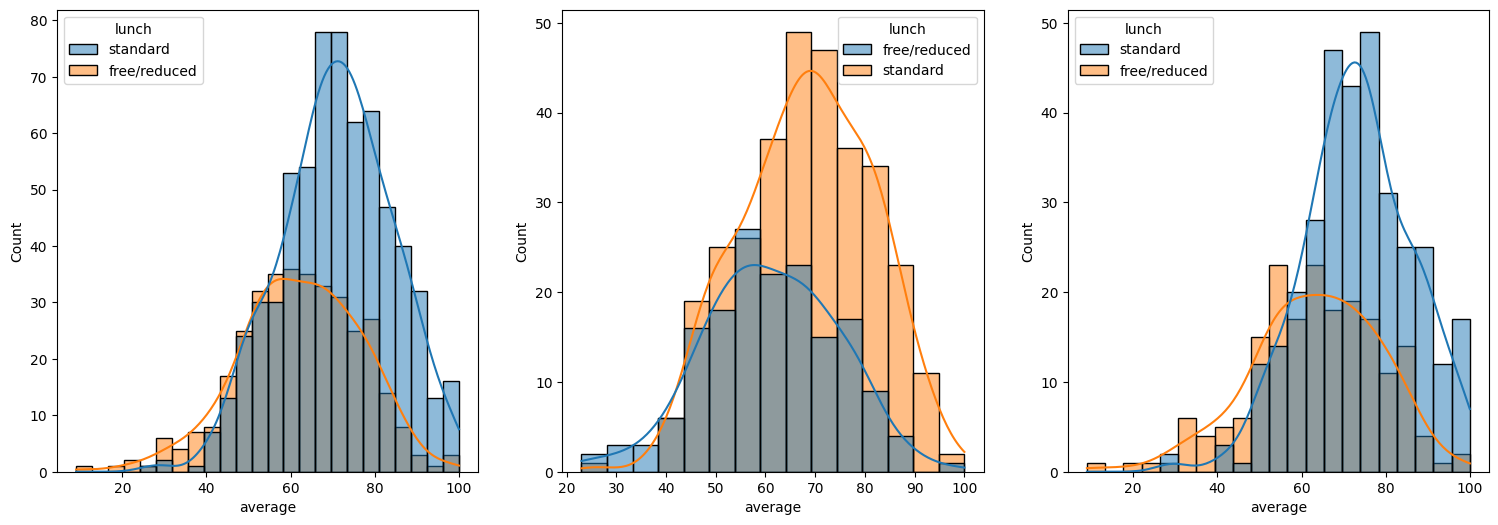

In [55]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x="average",kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'male'],x="average",kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'female'],x="average",kde=True, hue='lunch')
plt.show()

Insights:-

    => Students with standard lunch are performing well whether it may be male or female.

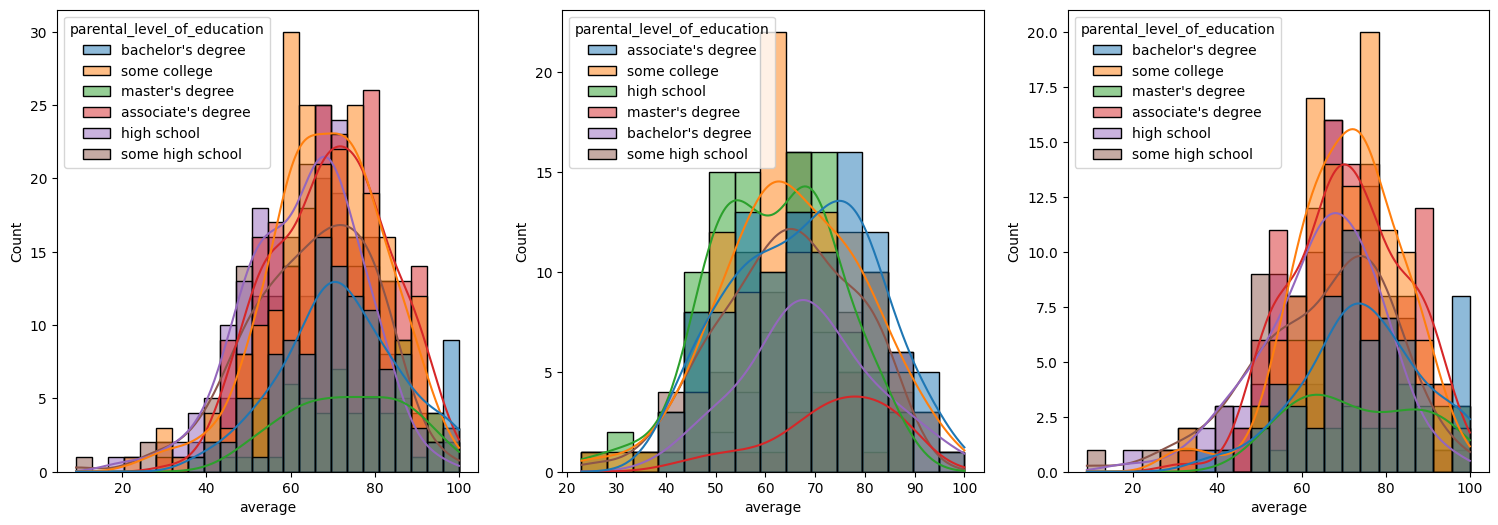

In [56]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x="average",kde=True, hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'male'],x="average",kde=True, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'female'],x="average",kde=True, hue='parental_level_of_education')
plt.show()

Insights:-

    => There is no impact of parental education on children's performance in exams

    => Male students whose parent's education is associate degree or master's degree are performing well.

    => Female students whose parent's education is master's degree are performing well.

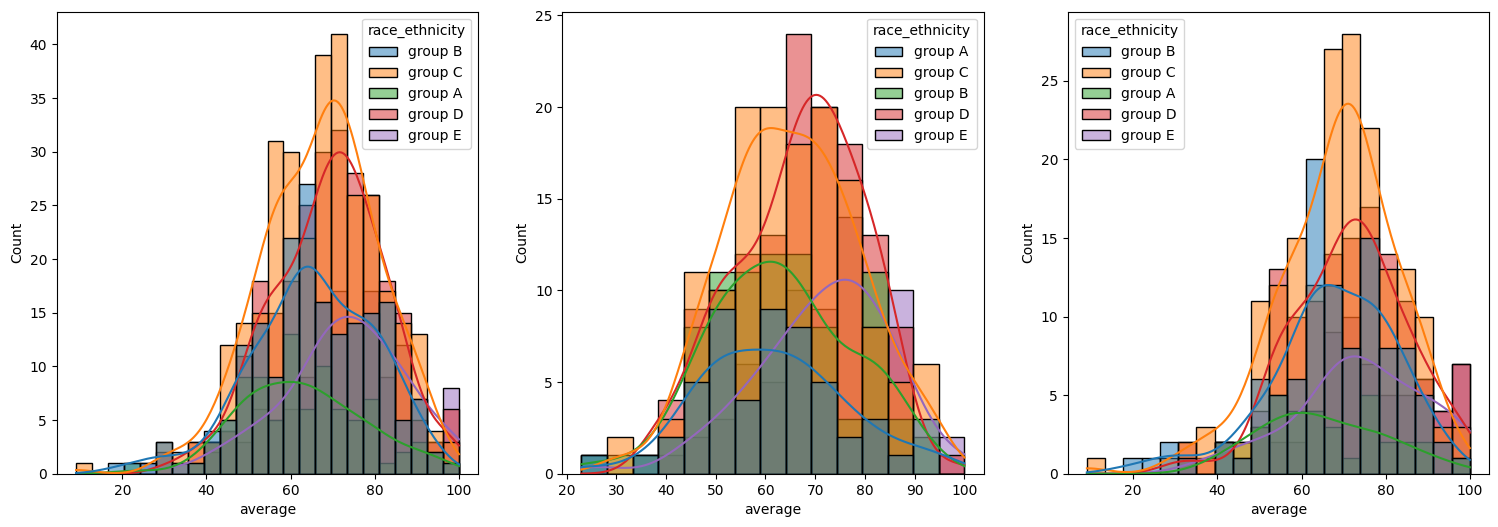

In [57]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x="average",kde=True, hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'male'],x="average",kde=True, hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'female'],x="average",kde=True, hue='race_ethnicity')
plt.show()

Insights:-

    => Students of group A and group B tends to perform poorly in exam irrespective their gender

4.2 Maximumum score of students in three subjects

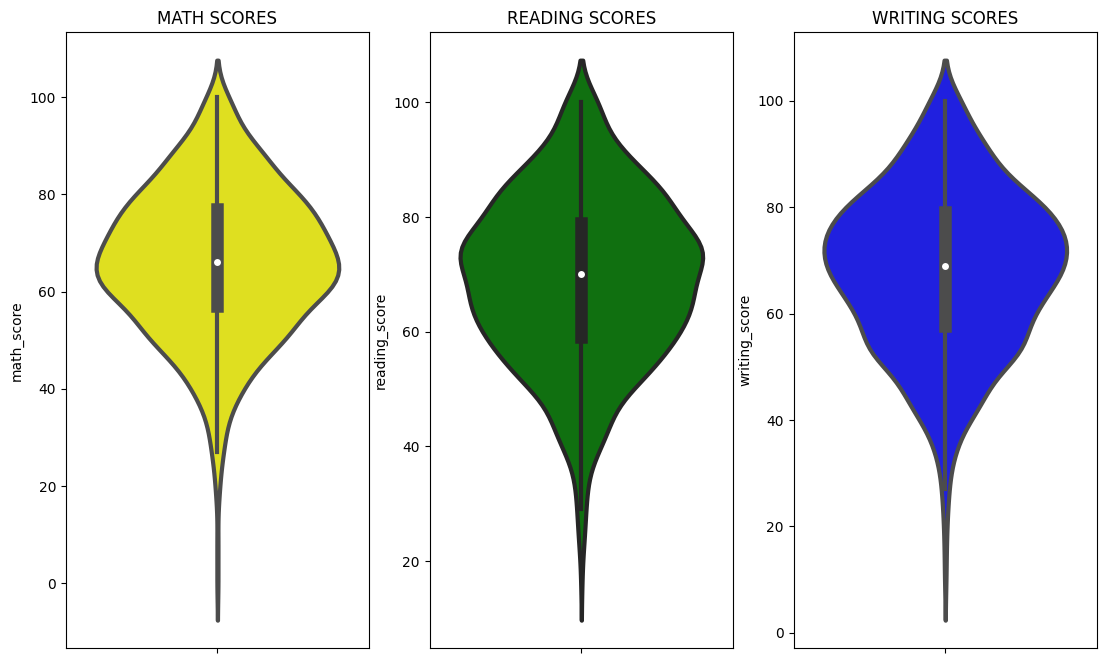

In [61]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='yellow',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insights:-

    => From the above three plots its clearly visible that most of the students score in between 60-80 marks in Maths whereas in reading and writing most of them score between 50-80 marks


4.3 Multivariate analysis using pieplot

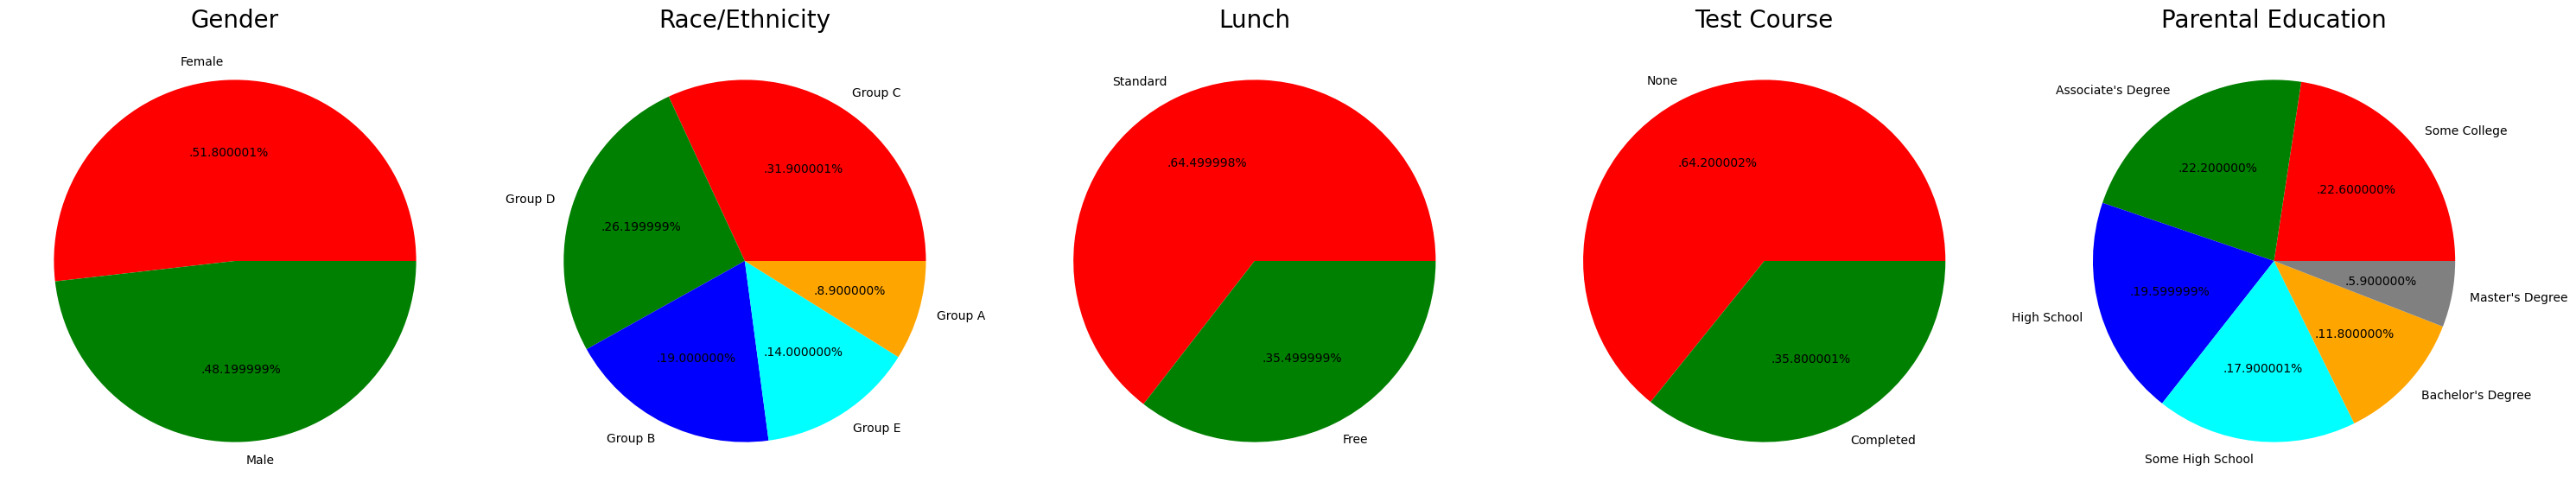

In [67]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights:-

    => Number of Male and Female students is almost equal

    => Number students are greatest in Group C

    => Number of students who have standard lunch are greater

    => Number of students who have not enrolled in any test preparation course is greater
    
    => Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

4.5 CHECKING OUTLIERS

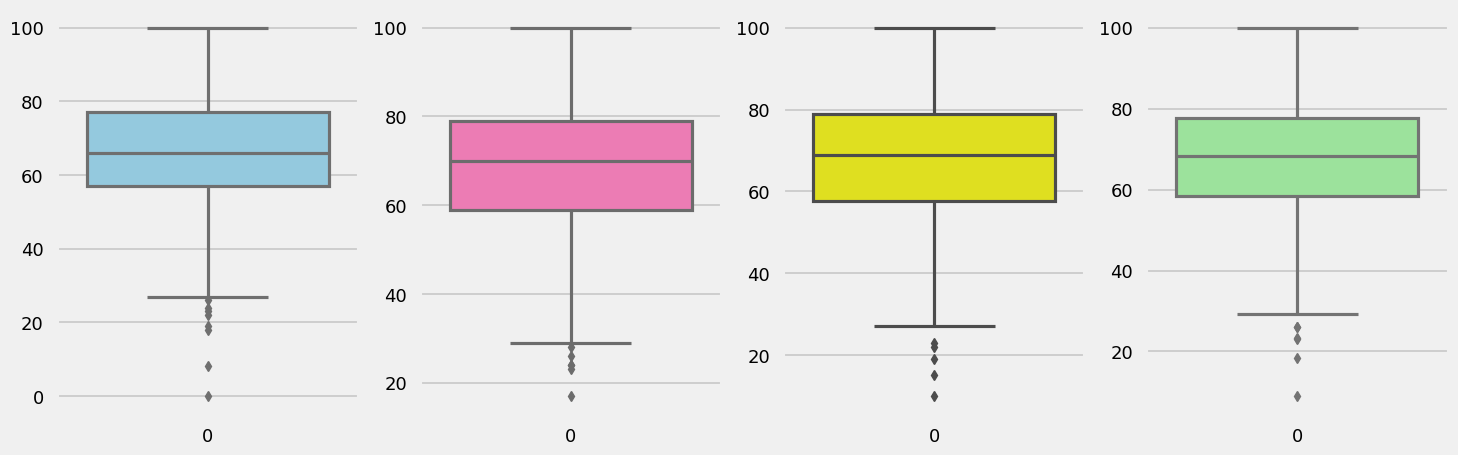

In [92]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

4.6 MUTIVARIATE ANALYSIS USING PAIRPLOT

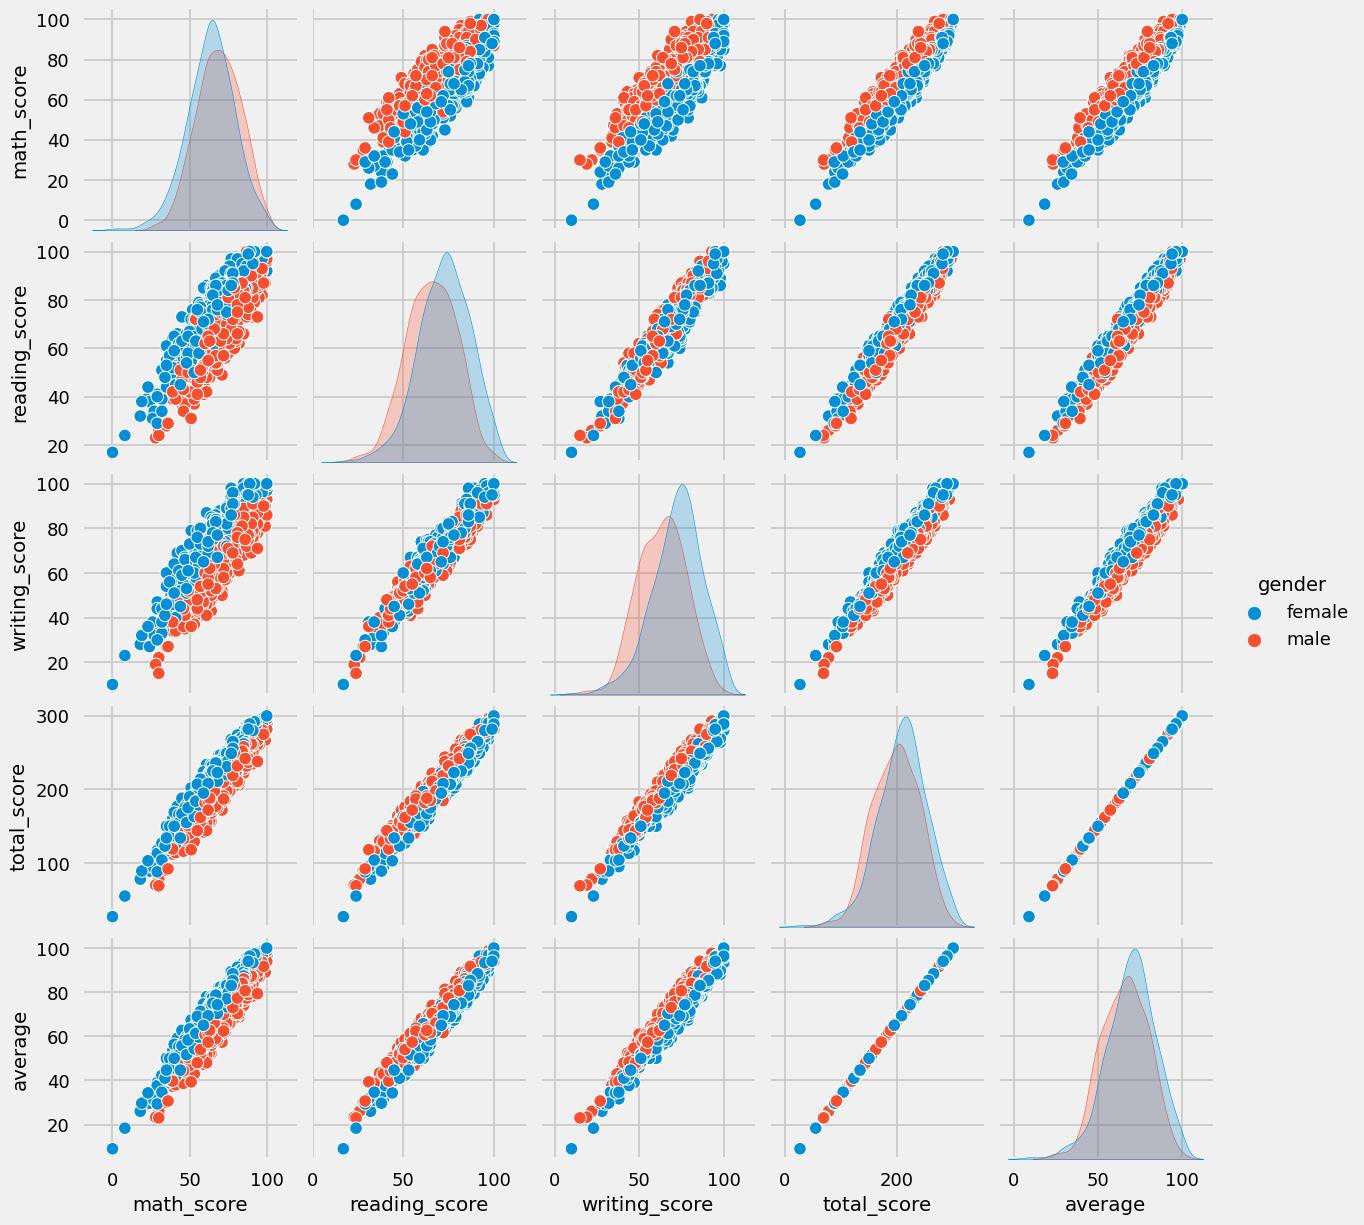

In [93]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights:-

    =>From the above plot it is clear that all the scores increase linearly with each other.


5. Conclusions

    => Student's Performance is related with lunch, race, parental level education

    => Females lead in pass percentage and also are top-scorers

    => Student's Performance is not much related with test preparation course
    
    => Finishing preparation course is benefitial.